
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [1700]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for plotting
from matplotlib import pyplot as plt # used for plotting
import pylab # used for statistical analysis
import pingouin as pg # used for statistical analysis

df_mh = pd.read_csv('/Users/xumengying/Desktop/MillerHadenData.csv')

In [1701]:
# Q1a (code):
# Display first few rows of the dataframe
print(df_mh.head())

# Check data types and information
print(df_mh.info())


   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB
None


In [1702]:
# Q1b (code):
# Check for missing values
print(df_mh.isnull().sum())

# Check whether there is a data point for each participant on both variables
abil_missing = df_mh['Abil'].isnull().sum()
iq_missing = df_mh['IQ'].isnull().sum()

if abil_missing == 0 and iq_missing == 0:
    print('no missing')
else:
    print('missing')

Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64
no missing


/Users/xumengying/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


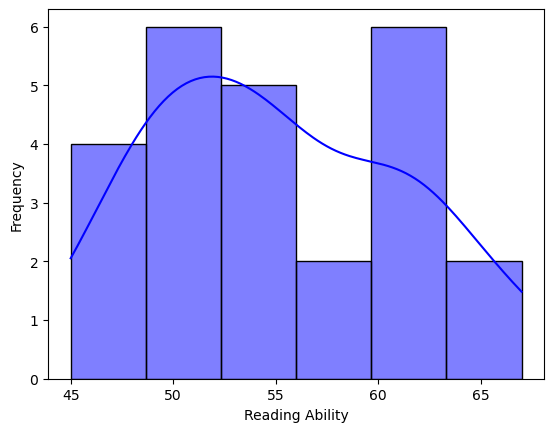

/Users/xumengying/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


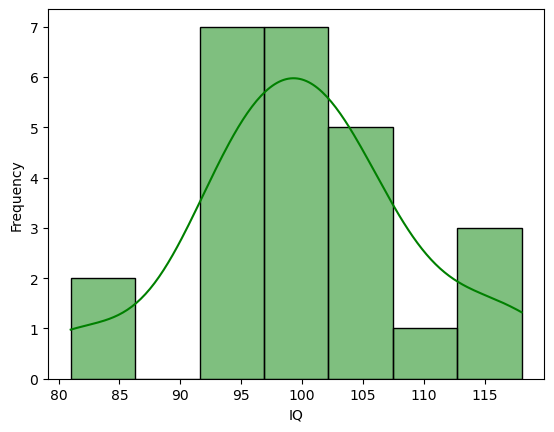

In [1703]:
# Q1c (code):
# Check data distribution
sns.histplot(df_mh['Abil'], kde = True, color = 'blue', label = 'Reading Ability')
plt.xlabel('Reading Ability')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df_mh['IQ'], kde = True, color = 'green', label = 'IQ')
plt.xlabel('IQ')
plt.ylabel('Frequency')
plt.show()

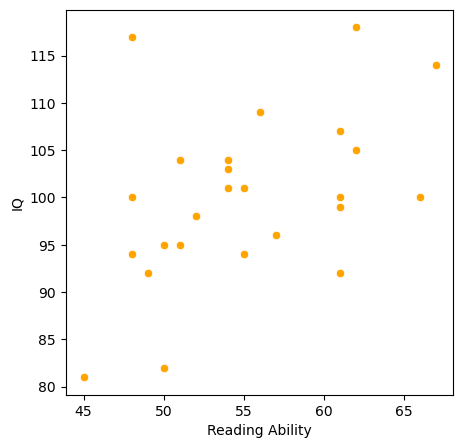

In [1704]:
# Q1d (code):
# Scatter plot
plt.figure(figsize=(5,5))
sns.scatterplot(data=df_mh, x='Abil', y='IQ', color='orange')
plt.xlabel('Reading Ability')
plt.ylabel('IQ')
plt.show()

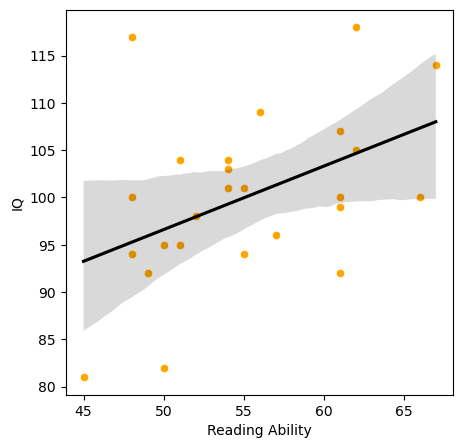

In [1705]:
# Q1e (code):
# Correlation line
plt.figure(figsize=(5,5))
sns.scatterplot(data=df_mh, x='Abil', y='IQ', color='orange')
sns.regplot(data=df_mh, x='Abil', y='IQ', color='black', scatter = False)
plt.xlabel('Reading Ability')
plt.ylabel('IQ')
plt.show()

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

In [1706]:
# Q2a (answer with words):
#The results show how reading ability and IQ scores are connected in a straight line. So, we guess that the numbers are mostly spread out in a normal way. That's why we pick the Pearson number to see how closely they're linked.

In [1707]:
pearson_corr = df_mh['Abil'].corr(df_mh['IQ'], method = 'pearson')
print (pearson_corr)

0.4511699387650762


In [1708]:
#positive, so there're connections. However, considering it's only 0.45, other factors may also influence the results.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [1709]:
# Q3a (answer in words):
# H0: there's no significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability)
# H1：there's significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability)

In [1710]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  # used for data wrangling
from scipy.stats import chi2_contingency ##used for Chi-square test

# Define the rounded average for Reading Ability and Home
abil_avg = df_mh['Abil'].mean()
home_avg = df_mh['Home'].mean()

# Create the Rank_Abil column
df_mh['Rank_Abil'] = 'low' 
df_mh.loc[df_mh['Abil'] > round(abil_avg), 'Rank_Abil'] = 'high'

# Create the Rank_Home column
df_mh['Rank_Home'] = 'infrequent'
df_mh.loc[df_mh['Home'] > round(home_avg), 'Rank_Home'] = 'frequent'

print(df_mh.head())

   Participant  Abil   IQ  Home   TV Rank_Abil   Rank_Home
0            1    61  107   144  487      high    frequent
1            2    56  109   123  608      high  infrequent
2            3    45   81   108  640       low  infrequent
3            4    66  100   155  493      high    frequent
4            5    49   92   103  636       low  infrequent


In [1711]:
# Q3c (code):
# Construct Contingency Matrix
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])
print(contingency_matrix)

Rank_Home  frequent  infrequent
Rank_Abil                      
high              8           2
low               3          12


In [1712]:
# Q3d (code):
# Perform the Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_matrix)
print(chi2)
print(p_value)

6.500270562770561
0.010785807794066234


In [1713]:
# Q3e (answer in words):
#reject H0 and support H1, that reading ability does affect how much people read at home

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [1714]:
import pandas as pd # used for data wrangling
from scipy import stats #used for statistical analysis
import numpy as np #used for calculating
import matplotlib.pyplot as plt #used for plotting
import seaborn as sns # used for visualization


# Load the data
df_evaluators = pd.read_csv('/Users/xumengying/Desktop/evaluators.csv')
df_evaluators.head()

,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [1715]:
# Q4a (code):
# Calculate mean and standard deviation for age
mean_age = df_evaluators['age'].mean()

std_age = df_evaluators['age'].std()

print(mean_age)
print(std_age)

30.852941176470587
6.238358141327351


In [1716]:
# Q4b (code)
# Count male and female evaluators
sex_counts = df_evaluators['sex'].value_counts()

# In the 'sex' column: 1 represents males and 2 represents females
num_males = sex_counts.get(1, 0)
num_females = sex_counts.get(2, 0)  

print(num_males)
print(num_females)

4
30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [1717]:
# Load ratings data
df_ratings = pd.read_csv('/Users/xumengying/Desktop/ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [1718]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
intellect_ratings = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]


# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
mean_intellect = intellect_ratings.groupby('eval_id')['Rating'].mean().reset_index()
mean_intellect['Category'] = 'intellect'

# Add a 'Category' column with the value 'intellect' for these rows
mean_intellect['Category'] = 'intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([mean_intellect, other_ratings], ignore_index=True)

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = pd.merge(ratings2, df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')

# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category'])

# Display the first few rows of the final 'ratings2' DataFrame to verify
print(ratings2.head())


    eval_id    Rating    Category condition
40        1  6.000000        hire  listened
39        1  7.000000  impression  listened
0         1  6.000000   intellect  listened
42        2  4.000000        hire  listened
41        2  4.666667  impression  listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [1719]:
# Q6a (answer in words):
# Null hypothesis:
#there's no significant differences

# Alternative hypothesis:
#there's siginificant differences

# we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

In [1720]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.
#two-tailed t-test, because we want to test ANY difference

In [1721]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?
#independent variable: listened to the pitches or read them
#dependent variable: ratings like intellect, impression, or hire scales


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [1723]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for tests

# Descriptive analysis of the ratings
ratings_desc = ratings2.groupby(['Category', 'condition'])['Rating'].describe()

#empty dictionaries to store the results
shapiro_results = {}
levene_results = {}
ttest_results = {}

#loop
categories = ['intellect', 'impression', 'hire']
conditions = ['listened', 'read']

# Test for normal distribution (Shapiro-Wilk test)
for category in categories:
    for condition in conditions:
        # filter ratings
        ratings = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == condition)]['Rating']
        # apply Shapiro-Wilk test
        shapiro_results[f'{category}_{condition}'] = shapiro(ratings)
# Test for homogeneity of variances (Levene's test)
for category in categories:
    # filter the ratings
    ratings_listened = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'listened')]['Rating']
    ratings_read = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'read')]['Rating']
    # apply Levene's test
    levene_results[category] = levene(ratings_listened, ratings_read)

# Independent t-tests
for category in categories:
    # filter the ratings
    ratings_listened = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'listened')]['Rating']
    ratings_read = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'read')]['Rating']
    # apply the independent t-test
    ttest_results[category] = ttest_ind(ratings_listened, ratings_read)

ratings_desc, shapiro_results, levene_results, ttest_results

(                      count      mean       std       min       25%       50%  \
 Category   condition                                                            
 hire       listened    21.0  4.714286  2.261479  0.000000  4.000000  5.000000   
            read        18.0  2.888889  2.054805  0.000000  1.250000  2.000000   
 impression listened    21.0  5.968254  1.917477  2.333333  4.666667  6.666667   
            read        18.0  4.074074  2.233306  0.333333  2.166667  4.500000   
 intellect  listened    21.0  5.634921  1.608674  2.333333  5.000000  5.666667   
            read        18.0  3.648148  1.911343  0.666667  2.083333  3.666667   
 
                            75%       max  
 Category   condition                      
 hire       listened   7.000000  8.000000  
            read       4.000000  7.000000  
 impression listened   7.333333  8.666667  
            read       5.333333  7.333333  
 intellect  listened   6.000000  9.000000  
            read       4.666667  7

In [1724]:
#Q7b (answer in words):
#descriptive statistics: listeners rating  higher
#Shapiro-Wilk Test: normally distributed
#Levene's Test: equal variances
#Independent T-tests: listeners rating higher

#first, t-test supports assumptions
#second, p-value is high
#third, listening or reading does affect, and listeners rating higher

In [ ]:
#https://www.marsja.se/how-to-perform-a-two-sample-t-test-with-python-3-different-methods/?utm_content=cmp-true
#https://www.youtube.com/watch?v=fb8BSFr0isg
#https://www.youtube.com/watch?v=CIbJSX-biu0&t=861s